# Histogram Processing

- Histograms capture the intensity distribution.
- Low contrast (differences/variations) images typically have the distribution clustered in a narrow range.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

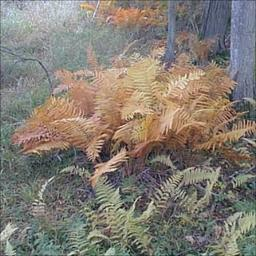

In [ ]:
img = cv2.imread('imgOCV/forest.jpg')
cv2_imshow(img)

## Gray-scale Histograms

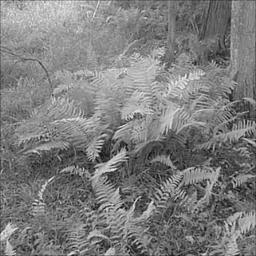

In [ ]:
img_Gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_Gray)

## Histogram Equalization - Contrast Stretching

- Changing the probability distribution of intensities in original image to roughly an uniform distribution.

$$ s_k = T(r_k) = (L-1) \sum_{j=0}^{k}p_r(r_j) $$
$$ \text{where, } k = 0 , 1, 2, ..., L-1$$

In [ ]:
img_n01 = img_Gray.astype(np.float32)/255

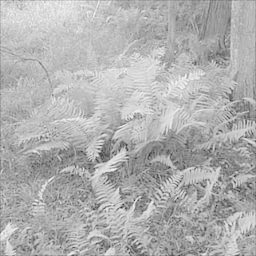

In [ ]:
# Increase brightness using gamma correction

gamma = 0.5
img_Bright = np.power(img_n01, gamma) * 255

cv2_imshow(img_Bright)


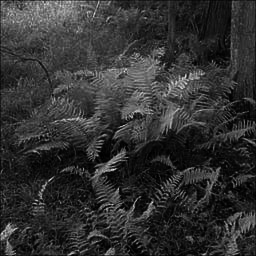

In [ ]:
# Decrease brightness using gamma correction

gamma = 2.5
img_Dark = np.power(img_n01, gamma) * 255

cv2_imshow(img_Dark)


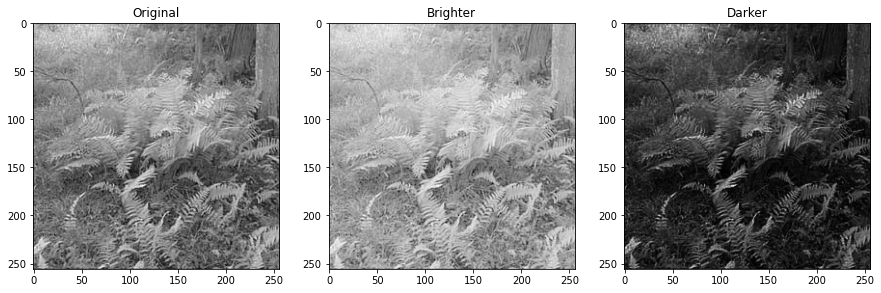

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.set_title('Original')
ax1.imshow(img_Gray, cmap='gray')

ax2.set_title('Brighter')
ax2.imshow(img_Bright, cmap='gray')

ax3.set_title('Darker')
ax3.imshow(img_Dark, cmap='gray')

In [ ]:
hist_Gray = cv2.calcHist(images=[img_Gray], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist_Bright = cv2.calcHist(images=[img_Bright], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist_Dark = cv2.calcHist(images=[img_Dark], channels=[0], mask=None, histSize=[256], ranges=[0,256])

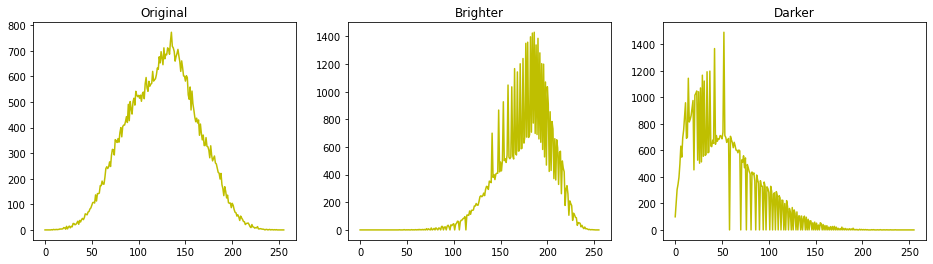

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# fig.set_figheight(15)
fig.set_figwidth(16)

ax1.set_title('Original')
ax1.plot(hist_Gray, color='y')

ax2.set_title('Brighter')
ax2.plot(hist_Bright, color='y')

ax3.set_title('Darker')
ax3.plot(hist_Dark, color='y')

In [ ]:
img_Gray_HistEq = cv2.equalizeHist(img_Gray)

img_Bright_HistEq = cv2.equalizeHist(img_Bright.astype(np.uint8))

img_Dark_HistEq = cv2.equalizeHist(img_Dark.astype(np.uint8))

In [ ]:
hist_Gray_HistEq = cv2.calcHist(images=[img_Gray_HistEq], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist_Bright_HistEq = cv2.calcHist(images=[img_Bright_HistEq], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist_Dark_HistEq = cv2.calcHist(images=[img_Dark_HistEq], channels=[0], mask=None, histSize=[256], ranges=[0,256])

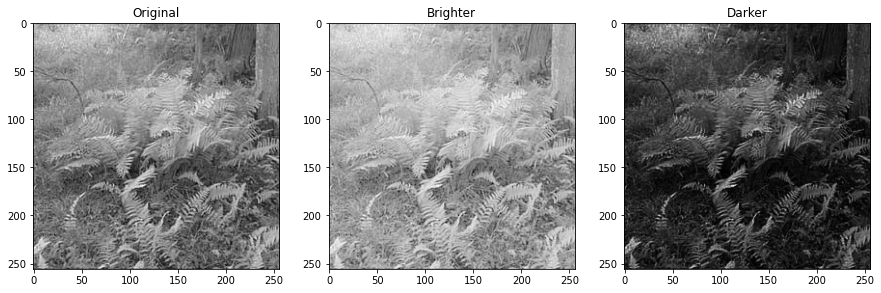

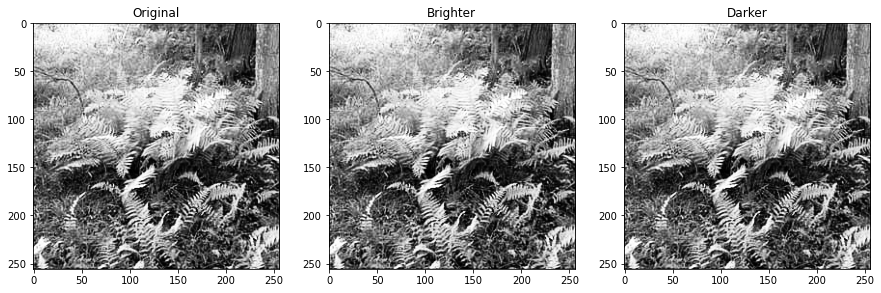

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.set_title('Original')
ax1.imshow(img_Gray, cmap='gray')

ax2.set_title('Brighter')
ax2.imshow(img_Bright, cmap='gray')

ax3.set_title('Darker')
ax3.imshow(img_Dark, cmap='gray')


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.set_title('Original')
ax1.imshow(img_Gray_HistEq, cmap='gray')

ax2.set_title('Brighter')
ax2.imshow(img_Bright_HistEq, cmap='gray')

ax3.set_title('Darker')
ax3.imshow(img_Dark_HistEq, cmap='gray')


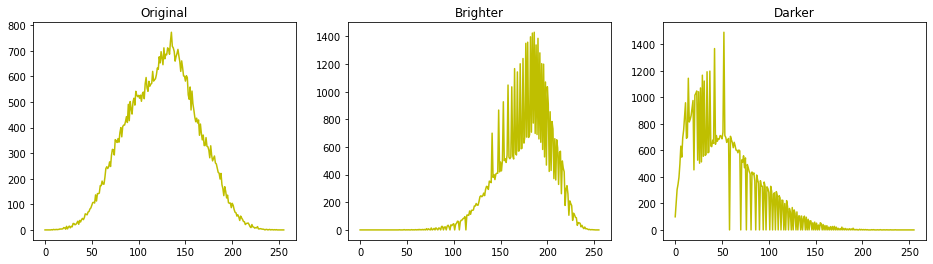

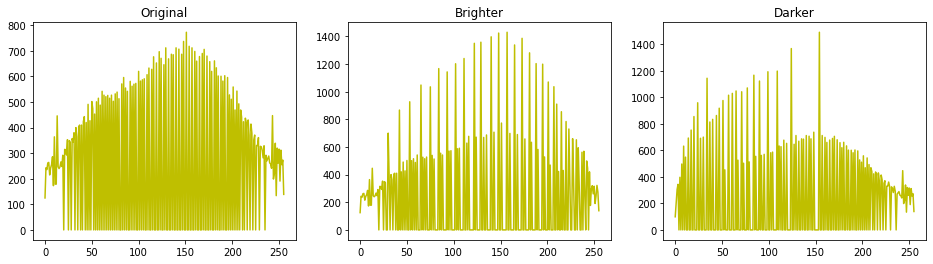

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figwidth(16)

ax1.set_title('Original')
ax1.plot(hist_Gray, color='y')

ax2.set_title('Brighter')
ax2.plot(hist_Bright, color='y')

ax3.set_title('Darker')
ax3.plot(hist_Dark, color='y')


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figwidth(16)

ax1.set_title('Original')
ax1.plot(hist_Gray_HistEq, color='y')

ax2.set_title('Brighter')
ax2.plot(hist_Bright_HistEq, color='y')

ax3.set_title('Darker')
ax3.plot(hist_Dark_HistEq, color='y')


## CLAHE - Contrast Limited Adaptive Histogram Equalization

- Trying to bring the images into similar lighting-condition

### Procedure
- Divides the image into non-overlapping blocks (tiles)
  - By default, it is 8x8 tiles/blocks

- Perform contrast stretching inside each block

- To remove bordering effect along the tiles, applied bilinear-filtering on borders.

In [ ]:
clahe_obj = cv2.createCLAHE(clipLimit=40, tileGridSize=(8,8))

img_Gray_CLAHE = clahe_obj.apply(img_Gray)
img_Bright_CLAHE = clahe_obj.apply(np.uint8(img_Bright))
img_Dark_CLAHE = clahe_obj.apply(np.uint8(img_Dark))

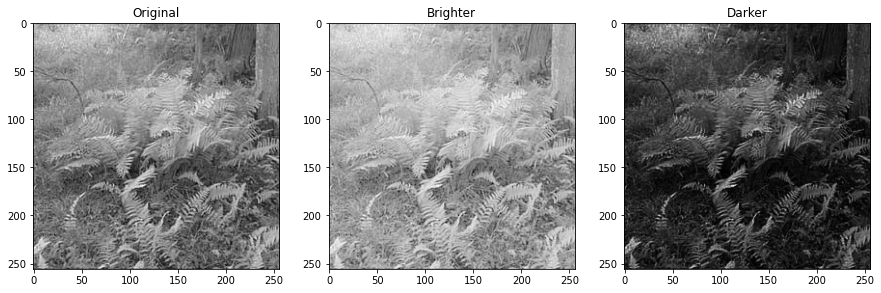

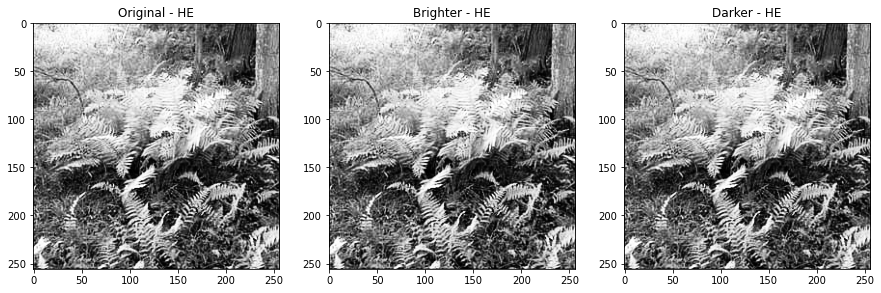

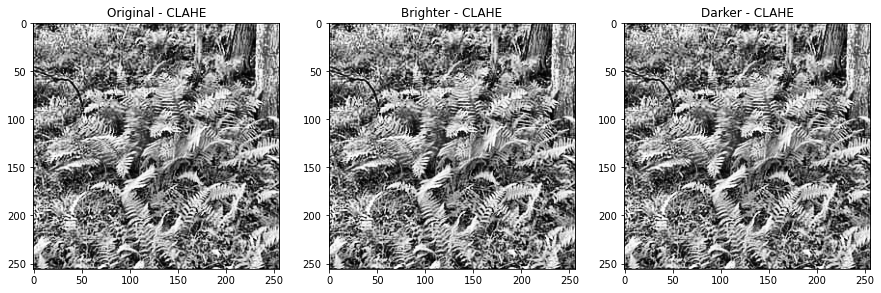

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.set_title('Original')
ax1.imshow(img_Gray, cmap='gray')

ax2.set_title('Brighter')
ax2.imshow(img_Bright, cmap='gray')

ax3.set_title('Darker')
ax3.imshow(img_Dark, cmap='gray')


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.set_title('Original - HE')
ax1.imshow(img_Gray_HistEq, cmap='gray')

ax2.set_title('Brighter - HE')
ax2.imshow(img_Bright_HistEq, cmap='gray')

ax3.set_title('Darker - HE')
ax3.imshow(img_Dark_HistEq, cmap='gray')


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.set_title('Original - CLAHE')
ax1.imshow(img_Gray_CLAHE, cmap='gray')

ax2.set_title('Brighter - CLAHE')
ax2.imshow(img_Bright_CLAHE, cmap='gray')

ax3.set_title('Darker - CLAHE')
ax3.imshow(img_Dark_CLAHE, cmap='gray')

In [ ]:
hist_Gray_CLAHE = cv2.calcHist(images=[img_Gray_CLAHE], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist_Bright_CLAHE = cv2.calcHist(images=[img_Bright_CLAHE], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist_Dark_CLAHE = cv2.calcHist(images=[img_Dark_CLAHE], channels=[0], mask=None, histSize=[256], ranges=[0,256])

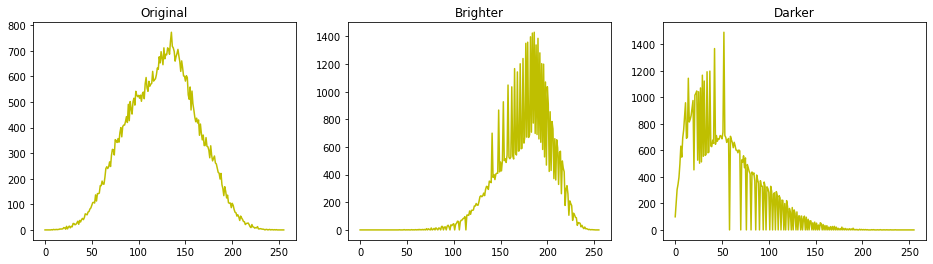

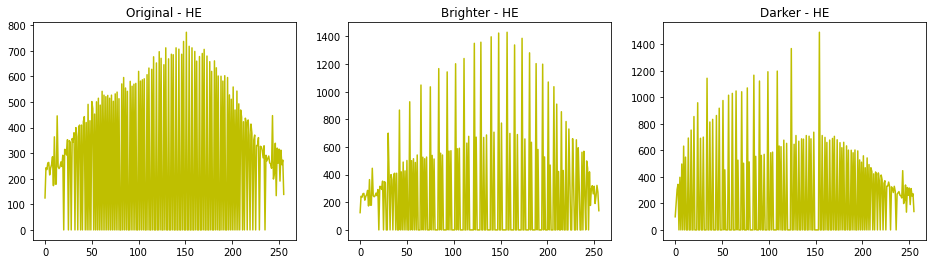

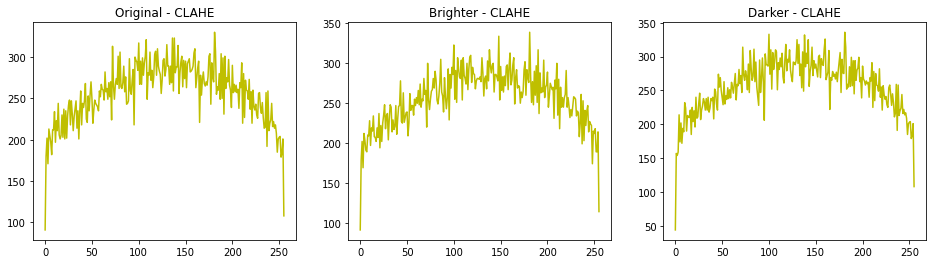

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figwidth(16)

ax1.set_title('Original')
ax1.plot(hist_Gray, color='y')

ax2.set_title('Brighter')
ax2.plot(hist_Bright, color='y')

ax3.set_title('Darker')
ax3.plot(hist_Dark, color='y')


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figwidth(16)

ax1.set_title('Original - HE')
ax1.plot(hist_Gray_HistEq, color='y')

ax2.set_title('Brighter - HE')
ax2.plot(hist_Bright_HistEq, color='y')

ax3.set_title('Darker - HE')
ax3.plot(hist_Dark_HistEq, color='y')


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figwidth(16)

ax1.set_title('Original - CLAHE')
ax1.plot(hist_Gray_CLAHE, color='y')

ax2.set_title('Brighter - CLAHE')
ax2.plot(hist_Bright_CLAHE, color='y')

ax3.set_title('Darker - CLAHE')
ax3.plot(hist_Dark_CLAHE, color='y')


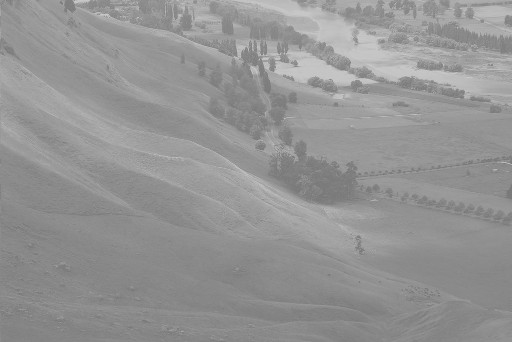

In [ ]:
img_HB = cv2.imread('imgOCV/Hawkes_Bay.jpg')
cv2_imshow(img_HB)